## Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


### IMPORTING NECESSARY LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### IMPORTING DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### INSPECTING DATASET

In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% customers have tenure of less than 55 months.

Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

### EDA

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.drop('customerID', axis=1, inplace=True)

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # Converting TotalCharges to numeric data type
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 84], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72', '72-84']) # Creating tenure groups
df.dropna(inplace=True) # Dropping missing values after converting TotalCharges to numeric data type

In [13]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [14]:
# Encoding categorical variables
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
for col in cat_cols:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes


In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,5
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,1,0


In [16]:
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
tenure_group           int8
dtype: object

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='gender', ylabel='Count'>

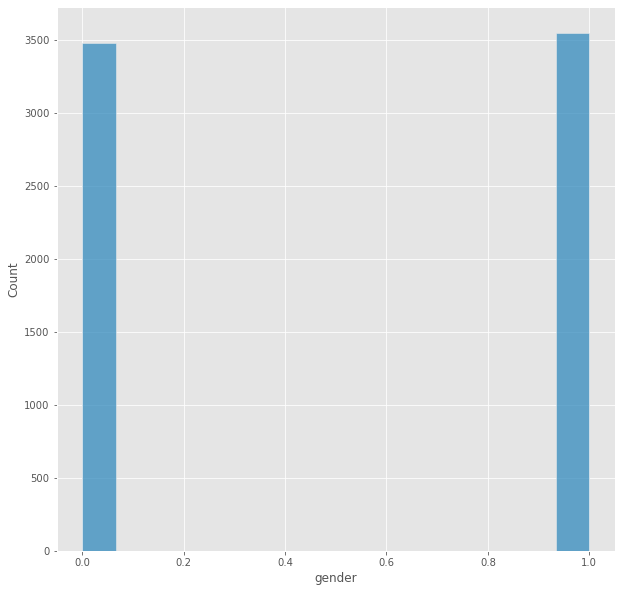

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(df['gender'], bins=15)

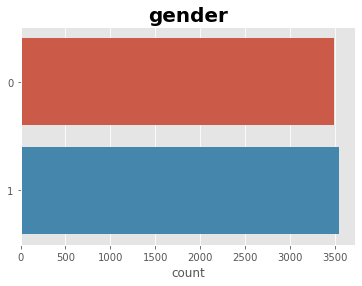

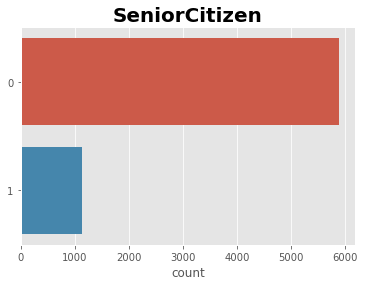

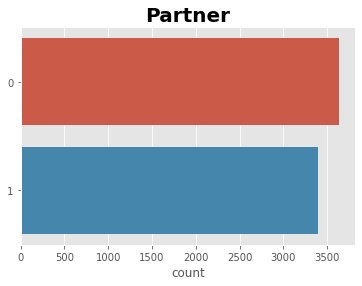

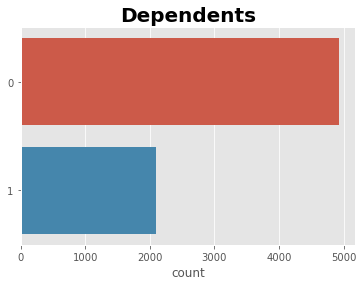

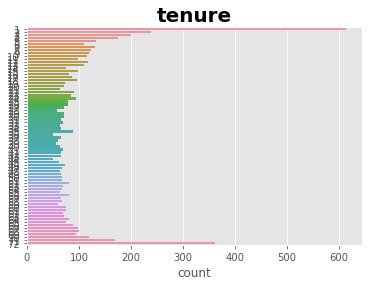

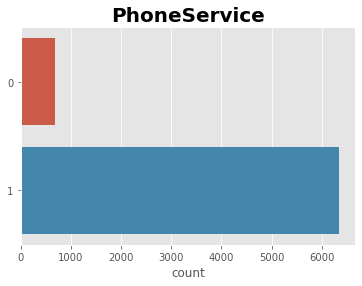

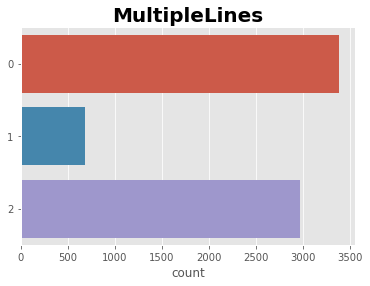

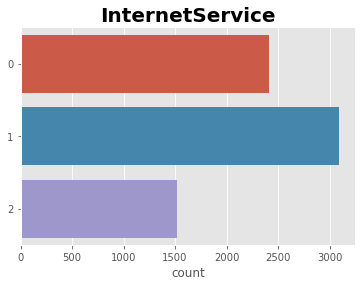

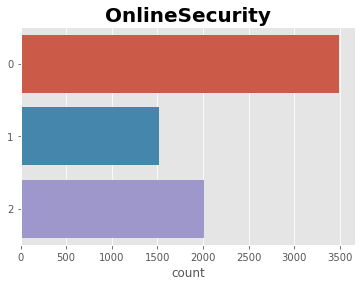

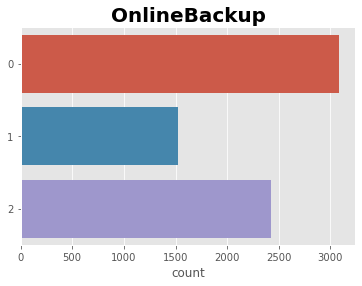

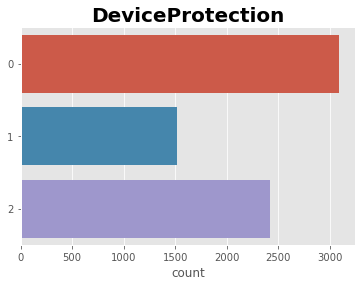

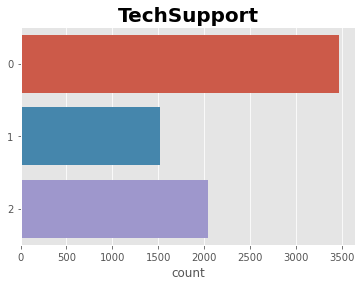

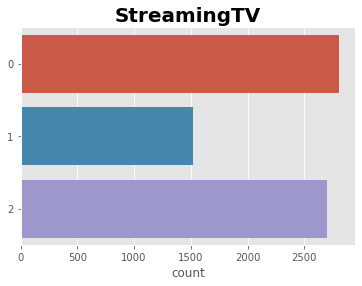

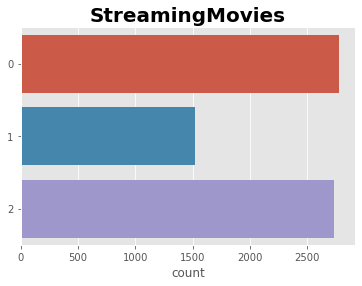

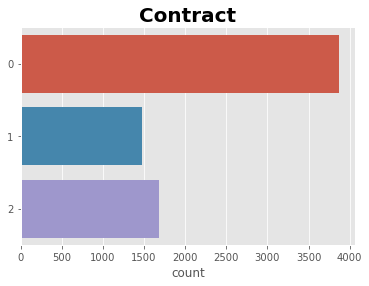

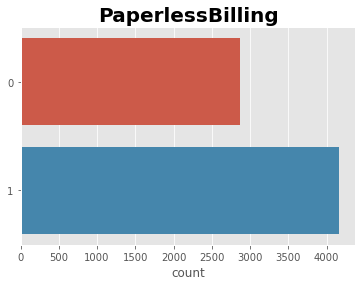

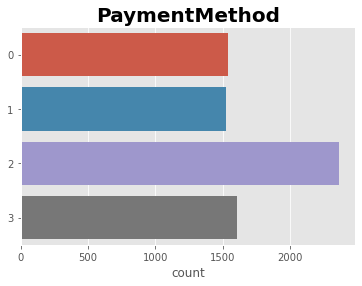

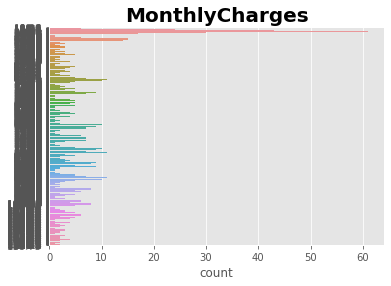

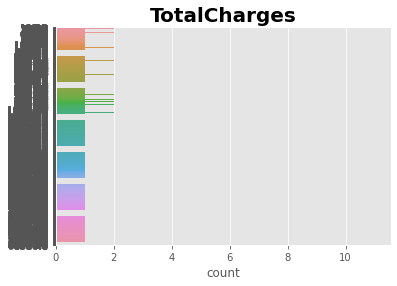

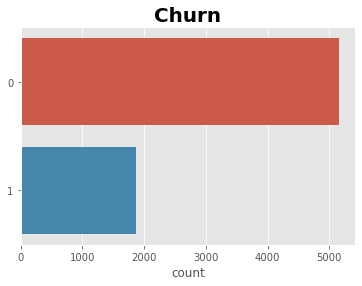

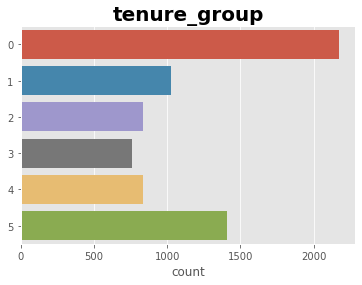

In [18]:
for i in df:
    a=sns.countplot(data=df,y=i)
    a.set_title(i,fontsize=20,fontweight ='bold')
    a.set_ylabel("")
    plt.show()

1.Male Female both have almost 50-50% chance of getting churned

2.Not a senior citizen have less churn percentage



<AxesSubplot:xlabel='tenure', ylabel='count'>

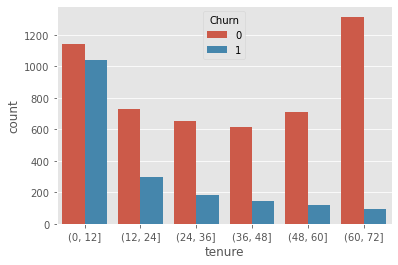

In [19]:
tb = pd.cut(df['tenure'], bins = range(0,73,12))
sns.countplot(data=df, x= tb, hue = 'Churn')

In [20]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           6
dtype: int64

In [21]:
df.shape

(7032, 21)

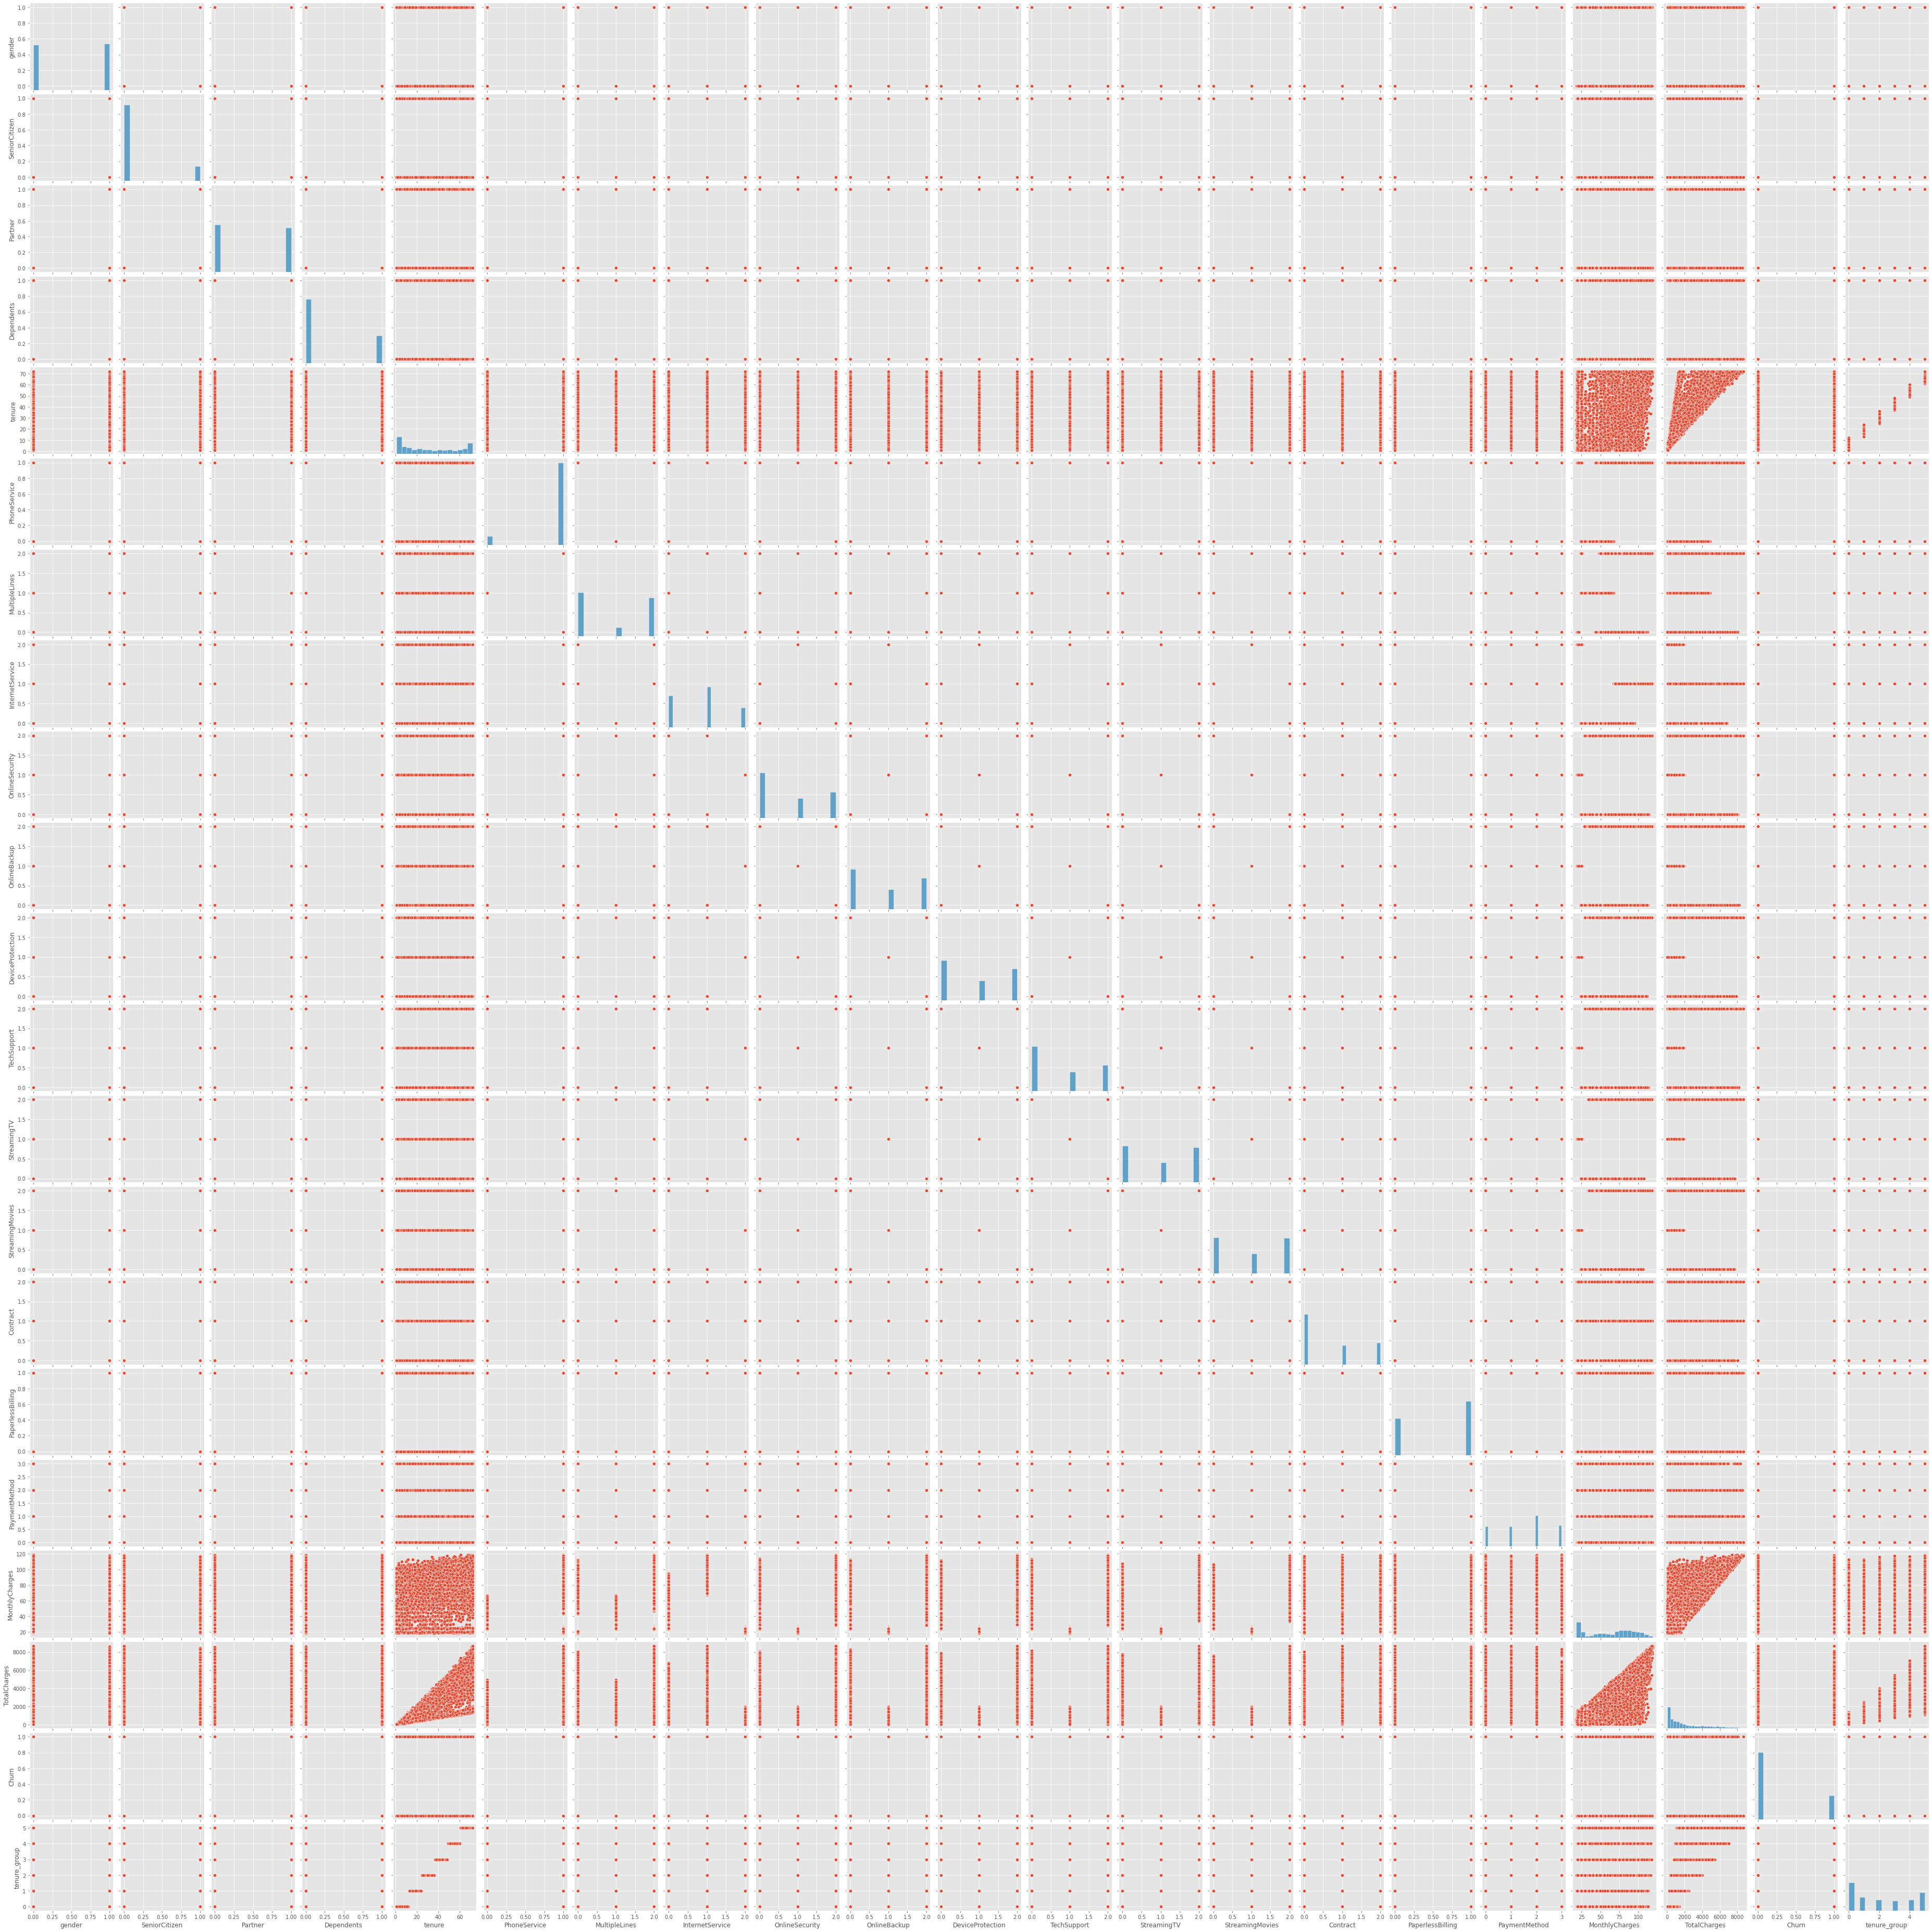

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
df.corr().round(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
gender,1.000,-0.002,-0.001,0.010,0.005,-0.008,-0.007,-0.002,-0.015,-0.012,...,-0.007,-0.006,-0.009,0.000,-0.012,0.017,-0.014,0.000,-0.009,0.006
SeniorCitizen,-0.002,1.000,0.017,-0.211,0.016,0.008,0.146,-0.032,-0.128,-0.013,...,-0.151,0.031,0.047,-0.142,0.156,-0.038,0.220,0.102,0.151,0.016
Partner,-0.001,0.017,1.000,0.452,0.382,0.018,0.143,0.001,0.151,0.153,...,0.126,0.137,0.130,0.294,-0.014,-0.156,0.098,0.319,-0.150,0.370
Dependents,0.010,-0.211,0.452,1.000,0.163,-0.001,-0.025,0.044,0.151,0.090,...,0.133,0.046,0.022,0.241,-0.110,-0.042,-0.112,0.065,-0.163,0.157
tenure,0.005,0.016,0.382,0.163,1.000,0.008,0.344,-0.030,0.327,0.372,...,0.325,0.291,0.297,0.677,0.005,-0.370,0.247,0.826,-0.354,0.989
PhoneService,-0.008,0.008,0.018,-0.001,0.008,1.000,-0.021,0.387,-0.014,0.024,...,-0.018,0.056,0.043,0.003,0.017,-0.005,0.248,0.113,0.012,0.007
MultipleLines,-0.007,0.146,0.143,-0.025,0.344,-0.021,1.000,-0.109,0.007,0.117,...,0.011,0.175,0.182,0.111,0.165,-0.177,0.434,0.453,0.038,0.335
InternetService,-0.002,-0.032,0.001,0.044,-0.030,0.387,-0.109,1.000,-0.028,0.037,...,-0.026,0.108,0.098,0.100,-0.138,0.085,-0.322,-0.176,-0.047,-0.029
OnlineSecurity,-0.015,-0.128,0.151,0.151,0.327,-0.014,0.007,-0.028,1.000,0.185,...,0.285,0.044,0.056,0.374,-0.158,-0.097,-0.054,0.254,-0.289,0.316
OnlineBackup,-0.012,-0.013,0.153,0.090,0.372,0.024,0.117,0.037,0.185,1.000,...,0.196,0.147,0.137,0.281,-0.013,-0.126,0.120,0.376,-0.195,0.367


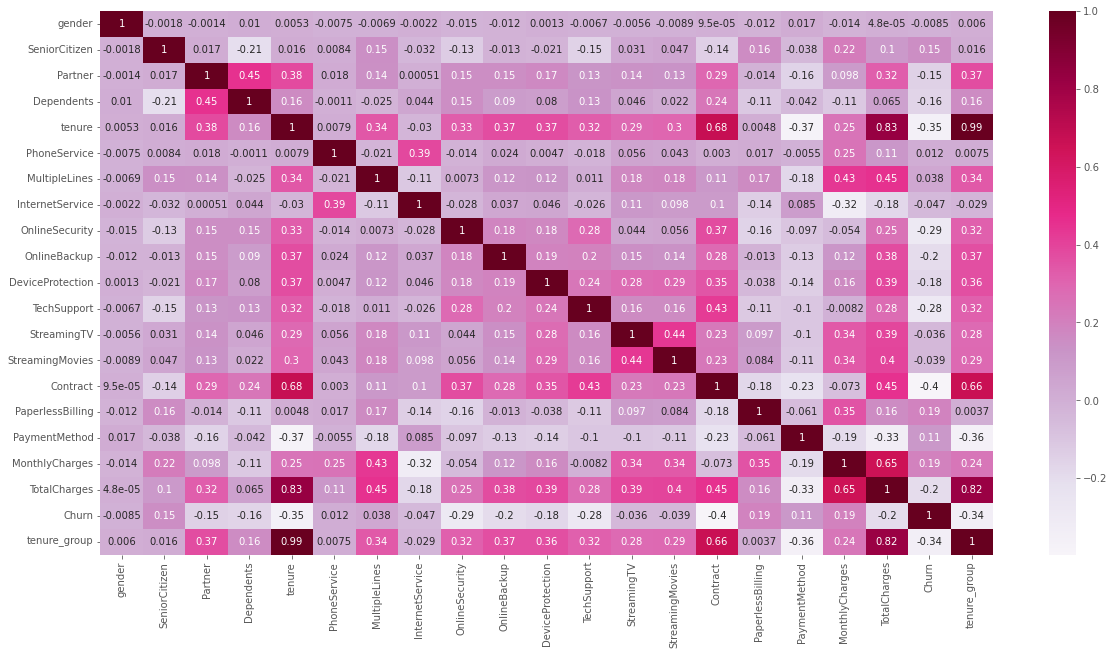

In [24]:
# heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap='PuRd')
plt.show()

### Skewness Removal

In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('gender')

# calculate skewness for numeric columns
skew_values = df[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

print(skew_values)

SeniorCitizen       1.830712
Churn               1.060396
TotalCharges        0.961437
Dependents          0.880720
Contract            0.635014
OnlineSecurity      0.418529
TechSupport         0.403880
tenure_group        0.250203
tenure              0.237680
InternetService     0.205660
DeviceProtection    0.187973
OnlineBackup        0.184050
MultipleLines       0.118597
Partner             0.070009
StreamingTV         0.029360
StreamingMovies     0.013848
PaymentMethod      -0.169352
MonthlyCharges     -0.222056
PaperlessBilling   -0.377422
PhoneService       -2.729144
dtype: float64


In [26]:
skewed_cols = skew_values[skew_values > 0.5].index  # Select columns with skewness > 0.5
df[skewed_cols] = np.log1p(df[skewed_cols])  # Apply logarithmic transformation


In [27]:
skew_values_after = df[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)


In [28]:
print("Skewness Before Transformation:")
print(skew_values)
print("\nSkewness After Transformation:")
print(skew_values_after)

Skewness Before Transformation:
SeniorCitizen       1.830712
Churn               1.060396
TotalCharges        0.961437
Dependents          0.880720
Contract            0.635014
OnlineSecurity      0.418529
TechSupport         0.403880
tenure_group        0.250203
tenure              0.237680
InternetService     0.205660
DeviceProtection    0.187973
OnlineBackup        0.184050
MultipleLines       0.118597
Partner             0.070009
StreamingTV         0.029360
StreamingMovies     0.013848
PaymentMethod      -0.169352
MonthlyCharges     -0.222056
PaperlessBilling   -0.377422
PhoneService       -2.729144
dtype: float64

Skewness After Transformation:
SeniorCitizen       1.831457
Churn               1.060396
Dependents          0.880733
Contract            0.437746
OnlineSecurity      0.418529
TechSupport         0.403880
tenure_group        0.250203
tenure              0.237680
InternetService     0.205660
DeviceProtection    0.187973
OnlineBackup        0.184050
MultipleLines       0.

Skewness have been removed.

### Outliers Treatment

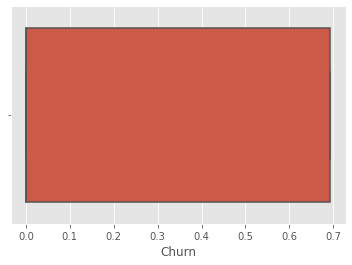

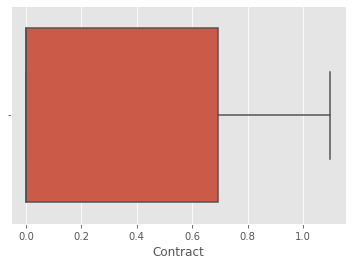

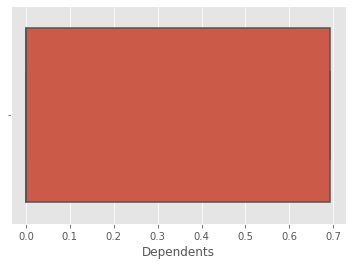

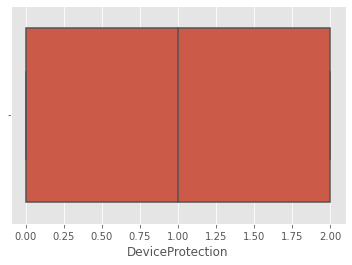

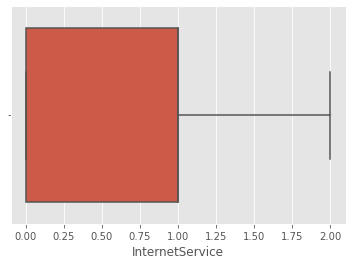

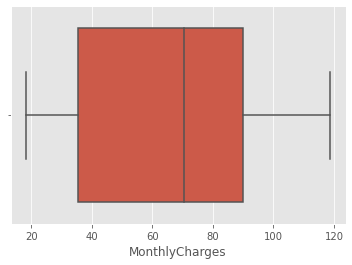

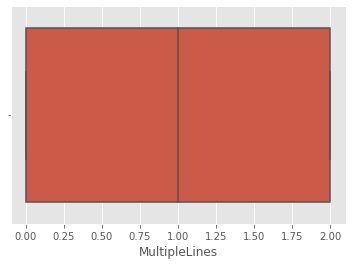

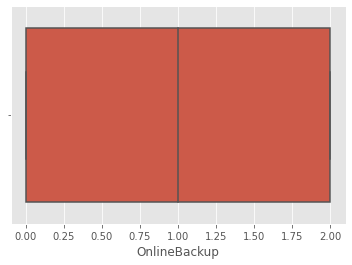

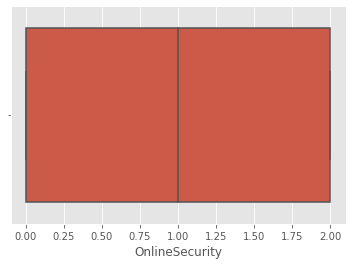

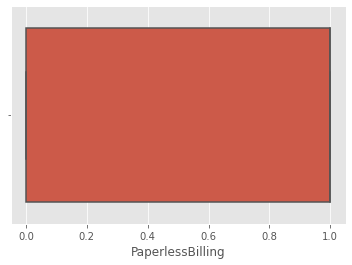

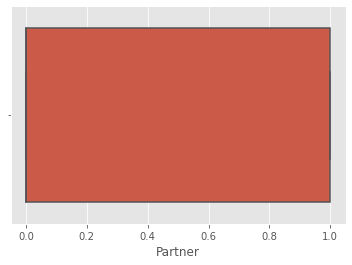

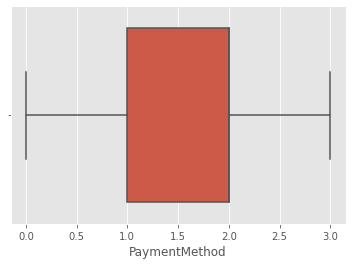

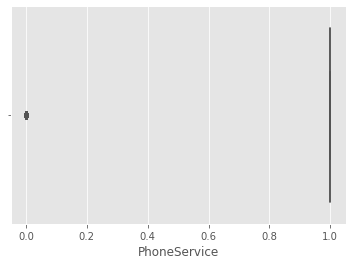

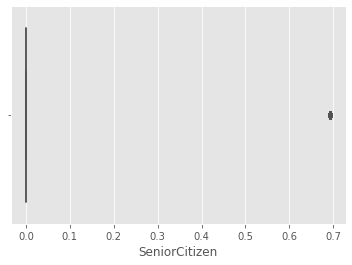

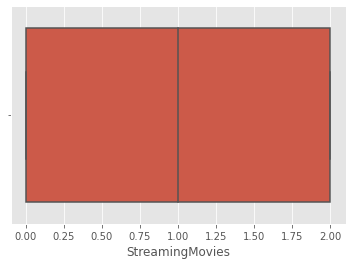

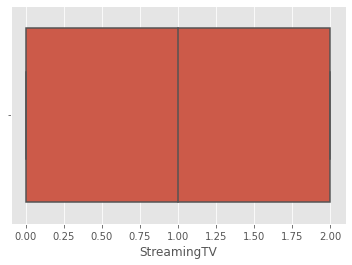

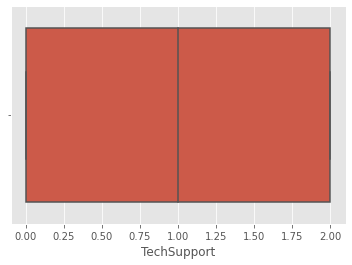

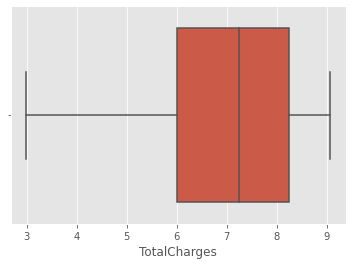

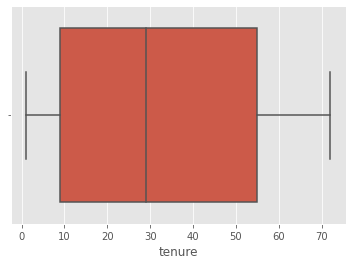

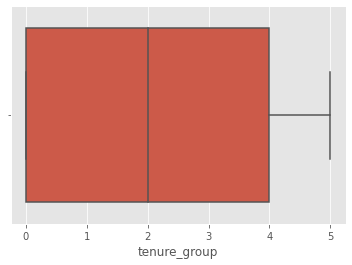

In [29]:
for col in df.columns.difference(['gender','churn']):
    sns.boxplot(df[col])
    plt.show()

In [30]:
# Calculate IQR for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Print the number of removed outliers
dfn = len(df) - len(df1)
print("Number of outliers removed:", dfn)

Number of outliers removed: 1718


### BIVARIATE ANALYSIS

In [36]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

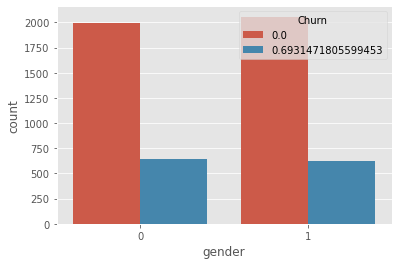

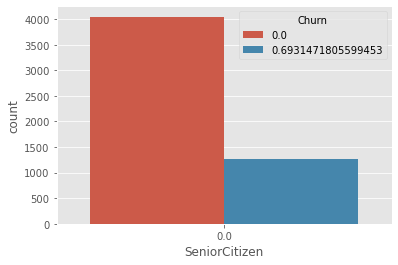

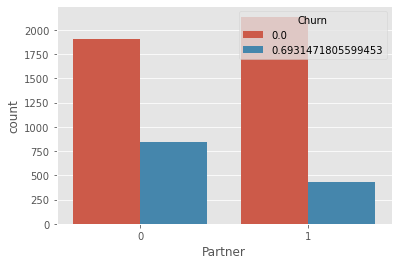

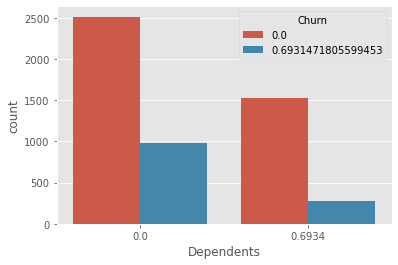

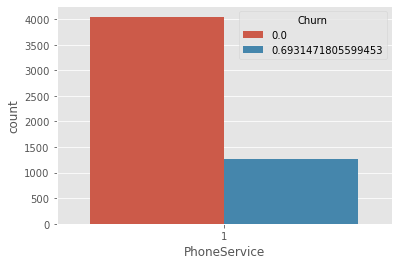

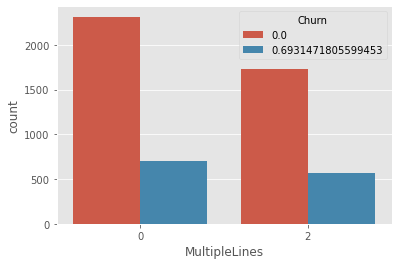

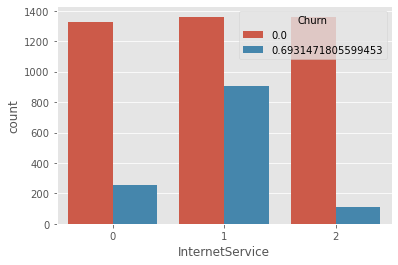

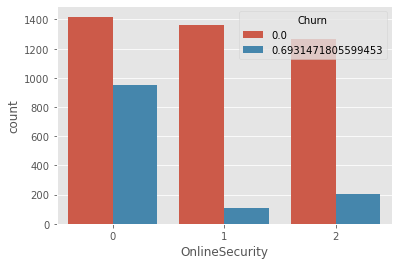

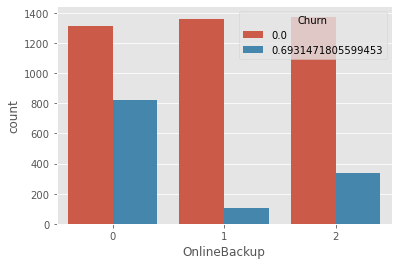

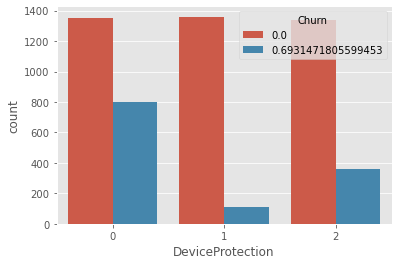

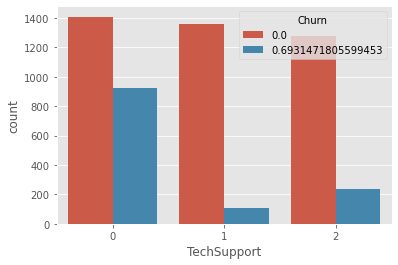

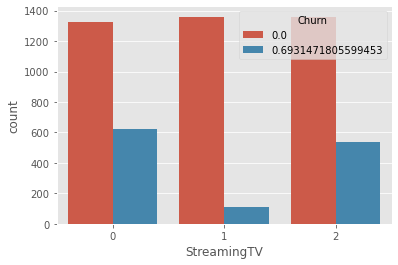

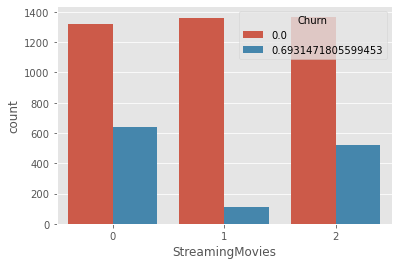

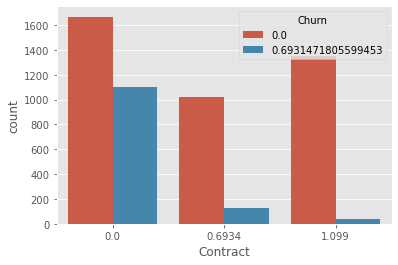

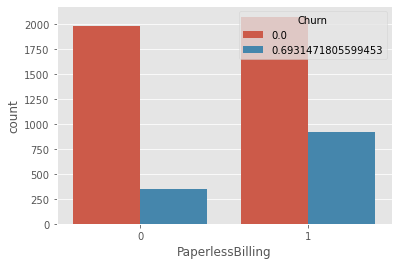

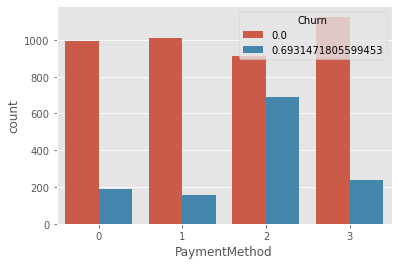

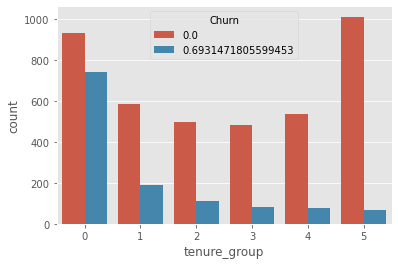

In [38]:
for i, x in enumerate(df1.drop(columns=['Churn','MonthlyCharges','TotalCharges','tenure'], axis=1)):
    plt.figure(i)
    sns.countplot(data=df1,hue='Churn',x=x)

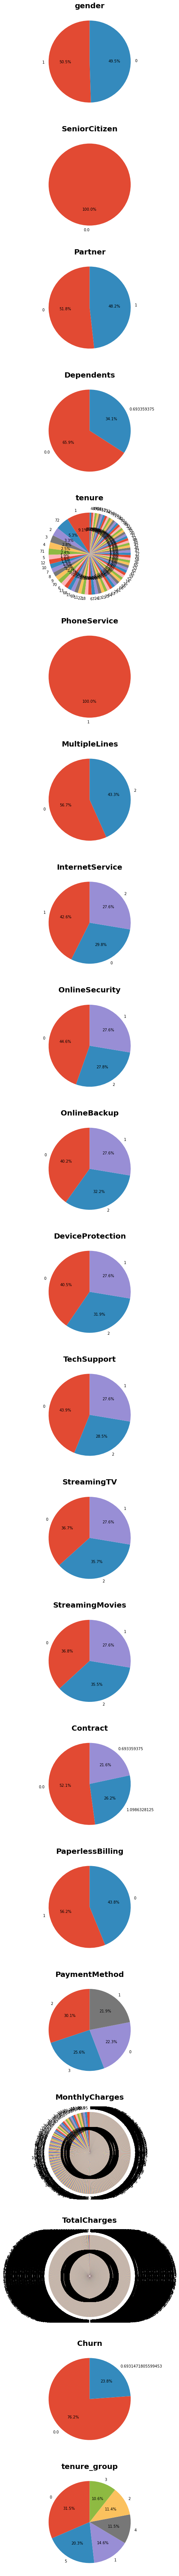

In [39]:
# Count the number of occurrences of each unique value in each column
value_counts = [df1[column].value_counts() for column in df1.columns]

# Create a figure with subplots for each column
fig, axs = plt.subplots(nrows=len(df1.columns), figsize=(8, 6*len(df.columns)))

# Plot a pie chart for each column
for i, (column, vc) in enumerate(zip(df1.columns, value_counts)):
    axs[i].pie(vc, labels=vc.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(column, fontsize=20, fontweight='bold')

plt.show()

In [45]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
1,1,0.0,0,0.000000,34,1,0,0,2,0,...,0,0,0,0.693359,0,3,56.95,7.544597,0.000000,2
2,1,0.0,0,0.000000,2,1,0,0,2,2,...,0,0,0,0.000000,1,3,53.85,4.692723,0.693147,0
4,0,0.0,0,0.000000,2,1,0,1,0,0,...,0,0,0,0.000000,1,2,70.70,5.028148,0.693147,0
5,0,0.0,0,0.000000,8,1,2,1,0,0,...,0,2,2,0.000000,1,2,99.65,6.711132,0.693147,0
6,1,0.0,0,0.693359,22,1,2,1,0,2,...,0,2,0,0.000000,1,1,89.10,7.575790,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,0.0,0,0.000000,19,1,0,1,0,0,...,0,2,0,0.000000,1,0,78.70,7.310617,0.000000,1
7037,0,0.0,0,0.000000,72,1,0,2,1,1,...,1,1,1,1.098633,1,0,21.15,7.258694,0.000000,5
7038,1,0.0,1,0.693359,24,1,2,0,2,0,...,2,2,2,0.693359,1,3,84.80,7.596643,0.000000,1
7039,0,0.0,1,0.693359,72,1,2,1,0,2,...,0,2,2,0.693359,1,1,103.20,8.904345,0.000000,5


### Scaling of Independent features

In [46]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.9962370649106302


At random state 1, The training accuracy is :-0.9962370649106302


At random state 2, The training accuracy is :-1.0


At random state 3, The training accuracy is :-0.9962370649106302


At random state 4, The training accuracy is :-0.9887111947318908


At random state 5, The training accuracy is :-0.9952963311382879


At random state 6, The training accuracy is :-0.9924741298212606


At random state 7, The training accuracy is :-0.9990592662276576


At random state 8, The training accuracy is :-0.9952963311382879


At random state 9, The training accuracy is :-0.9971777986829727


At random state 10, The training accuracy is :-0.9971777986829727


At random state 11, The training accuracy is :-0.9905926622765757


At random state 12, The training accuracy is :-1.0


At random state 13, The training accuracy is :-1.0


At random state 14, The training accuracy is :-0.9971777986829727


At random state 15, The training ac

At random state 76, The training accuracy is :-1.0

In [48]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=95)

In [49]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(4251, 20) (4251,)
(1063, 20) (1063,)


In [50]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.9482596425211665 
 [[350   6   0   0   0   0]
 [  5 128   6   0   0   0]
 [  0   9 104   2   0   0]
 [  0   0   7 108  11   0]
 [  0   0   0   2 116   6]
 [  0   0   0   0   1 202]] 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       356
           1       0.90      0.92      0.91       139
           2       0.89      0.90      0.90       115
           3       0.96      0.86      0.91       126
           4       0.91      0.94      0.92       124
           5       0.97      1.00      0.98       203

    accuracy                           0.95      1063
   macro avg       0.94      0.93      0.93      1063
weighted avg       0.95      0.95      0.95      1063
 

Cross Validation Score is : [0.94829612 0.95647059 0.94588235 0.94588235 0.93882353]
Mean Score : 0.9470709891477155


accuracy score for  GaussianNB() is :  0.9209783631232361 
 [[329  27   0   0   0   0]
 [  4 128   7   

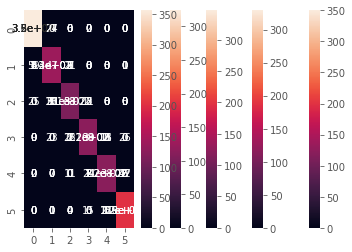

In [52]:
model=[lg,gnb,svc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

Accuracy score for RandomForestClassifier() is :  0.9962370649106302

In [53]:
dict2={"penalty":['l1', 'l2', 'elasticnet'],"solver":["lbfgs", "newton-cg","newton-cholesky","sag","saga"],"fit_intercept":[True, False],"C":[5,10,15,20]}
gv=GridSearchCV(lg,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'C': 20, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}

In [54]:
lg_f=LogisticRegression(C=5,fit_intercept=True, penalty="l2", solver="lbfgs")
lg_f.fit(train_x,train_y)
prf=lg_f.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(lg_f,train_x,train_y,cv=4)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.973659454374412
Cross Validation Score is : [0.97460019 0.97554092 0.96707432 0.95291902]
Mean Score : 0.9675336121873743


In [55]:
import joblib
joblib.dump(lg_f,"chrun.obj")

['chrun.obj']

In [56]:
chrun_model=joblib.load('chrun.obj')

In [57]:
result=chrun_model.predict(test_x)
print(accuracy_score(test_y,result))

0.973659454374412


### Prediction

In [60]:
#Predict

prediction = chrun_model.predict(x_test)

prediction

array([2, 5, 3, ..., 2, 5, 0], dtype=int8)

In [61]:
pd.DataFrame([chrun_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062
Predicted,2,5,3,5,3,0,0,3,5,0,...,1,5,0,0,4,0,3,2,5,0
Original,2,5,3,5,3,0,0,3,5,0,...,1,5,0,0,4,0,3,2,5,0
